In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:\\Users\\LENOVO\\OneDrive\\Desktop\\data_jobs.csv")
df.job_posted_date = pd.to_datetime(df.job_posted_date)
import ast

df = df[df["job_skills"].notna()]  # Remove NaNs to avoid errors

df["job_skills"] = df["job_skills"].apply(ast.literal_eval)

In [2]:
df_ger = df[df["job_country"] == "Germany"]
df_skills = df_ger.explode("job_skills")
df_skills[["job_title", "job_skills"]]

,job_title,job_skills
2,"Data Engineer/Scientist/Analyst, Mid or Senior...",python
2,"Data Engineer/Scientist/Analyst, Mid or Senior...",sql
2,"Data Engineer/Scientist/Analyst, Mid or Senior...",c#
2,"Data Engineer/Scientist/Analyst, Mid or Senior...",azure
2,"Data Engineer/Scientist/Analyst, Mid or Senior...",airflow
...,...,...
785735,Senior Data Engineer,docker
785737,CRM Data Analyst,sas
785737,CRM Data Analyst,sas
785737,CRM Data Analyst,sql


In [3]:
df_skills_count = df_skills.groupby(["job_skills", "job_title_short"]).size()
df_skills_count = df_skills_count.reset_index(name="skill_count")
df_skills_count.sort_values(by="skill_count", ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
907,python,Data Scientist,4157
906,python,Data Engineer,3524
1139,sql,Data Engineer,3145
1138,sql,Data Analyst,2947
905,python,Data Analyst,2309
...,...,...,...
254,django,Business Analyst,1
255,django,Cloud Engineer,1
256,django,Data Analyst,1
1127,spring,Senior Data Scientist,1


In [4]:
job_titles = df_skills_count["job_title_short"].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles


['Data Analyst', 'Data Engineer', 'Data Scientist']

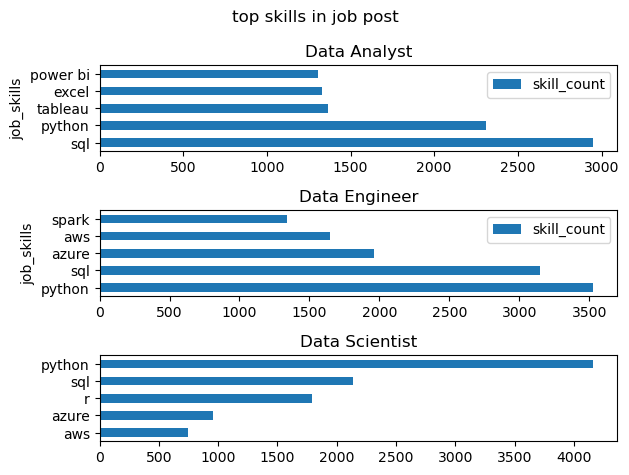

In [5]:
fig, ax = plt.subplots(len(job_titles), 1)
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count["job_title_short"] == job_title].head(5)
    df_plot.plot(kind="barh" , x="job_skills", y="skill_count", ax=ax[i], title=job_title)
ax[i].invert_yaxis()
ax[i].set_ylabel("")
ax[i].legend().set_visible(False)
fig.suptitle("top skills in job post")
fig.tight_layout()
plt.show()
    
    

In [6]:
df_job_count = df_ger["job_title_short"].value_counts().reset_index(name="jobs_total")

In [9]:
df_skills_count

,job_skills,job_title_short,skill_count
907,python,Data Scientist,4157
906,python,Data Engineer,3524
1139,sql,Data Engineer,3145
1138,sql,Data Analyst,2947
905,python,Data Analyst,2309
...,...,...,...
254,django,Business Analyst,1
255,django,Cloud Engineer,1
256,django,Data Analyst,1
1127,spring,Senior Data Scientist,1


In [7]:
df_skills_percent = pd.merge(df_skills_count, df_job_count, how="left", on="job_title_short")
df_skills_percent["skill_percent"] = 100 * df_skills_percent["skill_count"] / df_skills_percent["jobs_total"]
df_skills_percent

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,4157,5245,79.256435
1,python,Data Engineer,3524,5532,63.702097
2,sql,Data Engineer,3145,5532,56.851048
3,sql,Data Analyst,2947,5282,55.793260
4,python,Data Analyst,2309,5282,43.714502
...,...,...,...,...,...
1377,django,Business Analyst,1,613,0.163132
1378,django,Cloud Engineer,1,146,0.684932
1379,django,Data Analyst,1,5282,0.018932
1380,spring,Senior Data Scientist,1,1477,0.067705


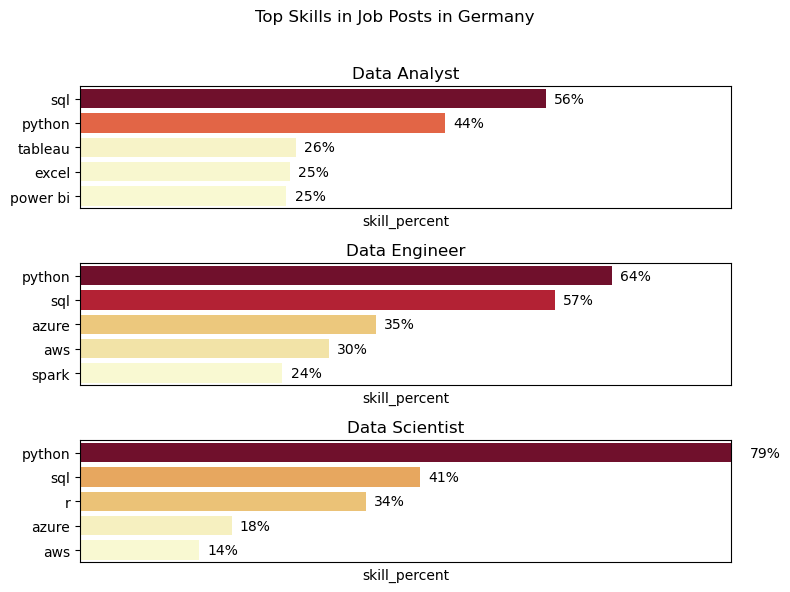

In [10]:

    
fig, ax = plt.subplots(len(job_titles), 1, figsize=(8, 6))

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent["job_title_short"] == job_title].head(5)
    
    
    df_plot.plot(kind="barh", x="job_skills", y="skill_percent", ax=ax[i], legend=False, color='skyblue')
    
    
    sns.barplot(data=df_plot, x="skill_percent", y="job_skills", ax=ax[i], hue="skill_count", palette="YlOrRd", dodge=False)
    
    ax[i].set_title(job_title)
    ax[i].set_ylabel("")
    ax[i].legend_.remove() 
    ax[i].set_xlim(0, 78)
    
   
    for n, v in enumerate(df_plot["skill_percent"]):
        ax[i].text(v + 1, n, f"{v:.0f}%", va="center")
    
    ax[i].set_xticks([])

fig.suptitle("Top Skills in Job Posts in Germany")
fig.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()